#### Importing the packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Read the Data

In [2]:
data_full  = pd.read_csv("russian_alcohol_consumption.csv")
data_full


,year,region,wine,beer,vodka,champagne,brandy
0,1998,Republic of Adygea,1.9,8.8,3.4,0.3,0.1
1,1998,Altai Krai,3.3,19.2,11.3,1.1,0.1
2,1998,Amur Oblast,2.1,21.2,17.3,0.7,0.4
3,1998,Arkhangelsk Oblast,4.3,10.6,11.7,0.4,0.3
4,1998,Astrakhan Oblast,2.9,18.0,9.5,0.8,0.2
...,...,...,...,...,...,...,...
1610,2016,Chuvash Republic,5.0,42.3,7.7,0.7,0.4
1611,2016,Chukotka Autonomous Okrug,3.9,34.0,11.6,1.8,1.1
1612,2016,Sakha (Yakutia) Republic,4.3,56.1,8.2,1.8,0.5
1613,2016,Yamalo-Nenets Autonomous Okrug,4.5,75.8,8.2,1.7,1.3


#### Data Information

In [3]:
data_full.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615 entries, 0 to 1614
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       1615 non-null   int64  
 1   region     1615 non-null   object 
 2   wine       1552 non-null   float64
 3   beer       1557 non-null   float64
 4   vodka      1554 non-null   float64
 5   champagne  1552 non-null   float64
 6   brandy     1549 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 88.4+ KB


#### Data Describe

In [5]:
data_full.describe()

,year,wine,beer,vodka,champagne,brandy
count,1615.000000,1552.000000,1557.000000,1554.000000,1552.000000,1549.000000
mean,2007.000000,5.628144,51.260148,11.818694,1.313177,0.526998
std,5.478922,2.813208,25.372821,5.128806,0.797956,0.400201
min,1998.000000,0.100000,0.400000,0.050000,0.100000,0.000000
25%,2002.000000,3.575000,32.400000,8.300000,0.800000,0.200000
50%,2007.000000,5.400000,49.970000,11.500000,1.200000,0.400000
75%,2012.000000,7.377500,67.400000,15.000000,1.665000,0.700000
max,2016.000000,18.100000,207.300000,40.600000,5.560000,2.300000


#### Data Cleaning

In [7]:
data_full.dropna(inplace=True)
data_full["year"]=pd.to_datetime(data_full["year"])
data_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1549 entries, 0 to 1614
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   year       1549 non-null   datetime64[ns]
 1   region     1549 non-null   object        
 2   wine       1549 non-null   float64       
 3   beer       1549 non-null   float64       
 4   vodka      1549 non-null   float64       
 5   champagne  1549 non-null   float64       
 6   brandy     1549 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 96.8+ KB


In [8]:
data_full


,year,region,wine,beer,vodka,champagne,brandy
0,1970-01-01 00:00:00.000001998,Republic of Adygea,1.9,8.8,3.4,0.3,0.1
1,1970-01-01 00:00:00.000001998,Altai Krai,3.3,19.2,11.3,1.1,0.1
2,1970-01-01 00:00:00.000001998,Amur Oblast,2.1,21.2,17.3,0.7,0.4
3,1970-01-01 00:00:00.000001998,Arkhangelsk Oblast,4.3,10.6,11.7,0.4,0.3
4,1970-01-01 00:00:00.000001998,Astrakhan Oblast,2.9,18.0,9.5,0.8,0.2
...,...,...,...,...,...,...,...
1610,1970-01-01 00:00:00.000002016,Chuvash Republic,5.0,42.3,7.7,0.7,0.4
1611,1970-01-01 00:00:00.000002016,Chukotka Autonomous Okrug,3.9,34.0,11.6,1.8,1.1
1612,1970-01-01 00:00:00.000002016,Sakha (Yakutia) Republic,4.3,56.1,8.2,1.8,0.5
1613,1970-01-01 00:00:00.000002016,Yamalo-Nenets Autonomous Okrug,4.5,75.8,8.2,1.7,1.3


#### Analysis

<AxesSubplot:>

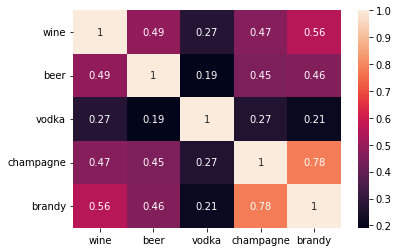

In [10]:
sns.heatmap(data_full.corr(), annot=True)

#### Frist_product: Wine

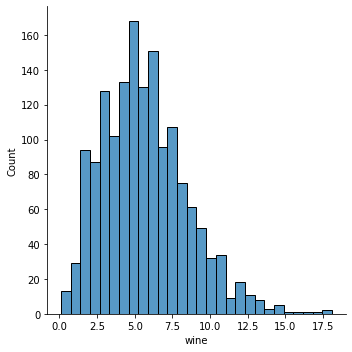

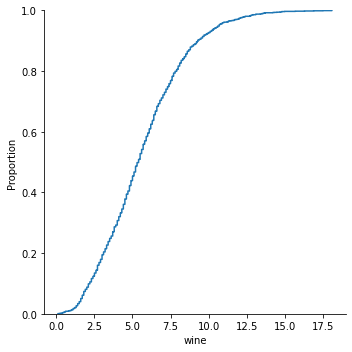

In [12]:
sns.displot(data_full["wine"])
sns.displot(data_full["wine"], kind="ecdf")
plt.show()

In [13]:
data_wine = data_full.groupby(["region"])["wine"].sum().sort_values(ascending=False).reset_index()
data_wine

,region,wine
0,Republic of Karelia,204.48
1,Pskov Oblast,195.85
2,Vologda Oblast,177.24
3,Komi Republic,175.25
4,Novgorod Oblast,174.51
...,...,...
79,Karachay-Cherkess Republic,40.26
80,Republic of North Ossetia-Alania,33.12
81,Republic of Ingushetia,29.80
82,Sevastopol,16.00


#### The top 20 for wine region

In [15]:
data_wine_region = data_wine["region"].head(20)
data_wine_region

0         Republic of Karelia
1                Pskov Oblast
2              Vologda Oblast
3               Komi Republic
4             Novgorod Oblast
5     Nenets Autonomous Okrug
6          Arkhangelsk Oblast
7             Murmansk Oblast
8            Leningrad Oblast
9                Kirov Oblast
10            Smolensk Oblast
11         Kaliningrad Oblast
12          Sverdlovsk Oblast
13                     Moscow
14             Kamchatka Krai
15             Ivanovo Oblast
16             Krasnodar Krai
17           Yaroslavl Oblast
18                Tver Oblast
19           Saint Petersburg
Name: region, dtype: object

#### Second product: Beer


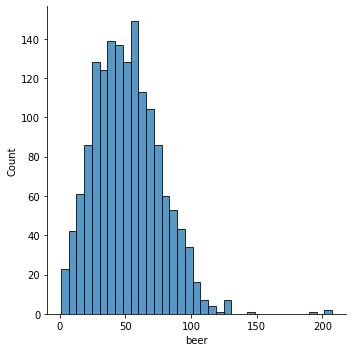

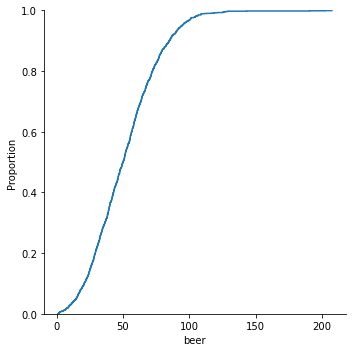

In [17]:
sns.displot(data_full["beer"])
sns.displot(data_full["beer"],kind="ecdf")
plt.show()

In [18]:
data_beer = data_full.groupby(["region"])["beer"].sum().sort_values(ascending=False).reset_index()
data_beer

,region,beer
0,Saint Petersburg,1603.13
1,Moscow,1590.08
2,Yamalo-Nenets Autonomous Okrug,1522.62
3,Tyumen Oblast,1462.05
4,Omsk Oblast,1456.23
...,...,...
79,Chukotka Autonomous Okrug,292.91
80,Republic of Crimea,101.10
81,Republic of Dagestan,88.24
82,Sevastopol,64.10


#### The top 20 for Beer region

In [20]:
data_beer_region = data_beer["region"].head(20)
data_beer_region

0                          Saint Petersburg
1                                    Moscow
2            Yamalo-Nenets Autonomous Okrug
3                             Tyumen Oblast
4                               Omsk Oblast
5                        Chelyabinsk Oblast
6     Khanty–Mansi Autonomous Okrug – Yugra
7                            Ivanovo Oblast
8                         Sverdlovsk Oblast
9                           Khabarovsk Krai
10                         Zabaykalsky Krai
11                           Vologda Oblast
12                            Komi Republic
13                    Republic of Khakassia
14                       Novosibirsk Oblast
15                         Krasnoyarsk Krai
16                                Perm Krai
17                         Yaroslavl Oblast
18                          Smolensk Oblast
19                            Moscow Oblast
Name: region, dtype: object

#### Third product: Vodka

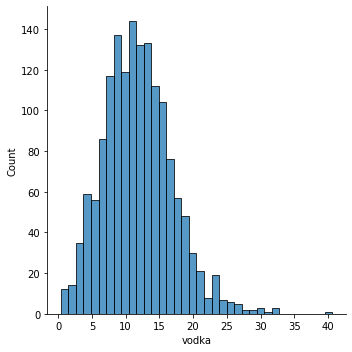

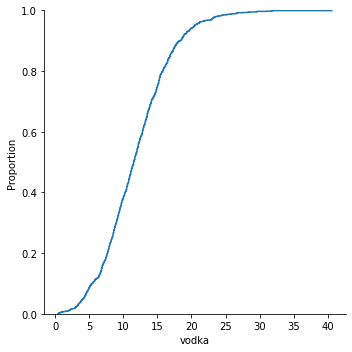

In [22]:
sns.displot(data_full["vodka"])
sns.displot(data_full["vodka"],kind="ecdf")
plt.show()

In [23]:
data_vodka = data_full.groupby(["region"])["vodka"].sum().sort_values(ascending=False).reset_index()
data_vodka

,region,vodka
0,Komi Republic,392.43
1,Kamchatka Krai,374.53
2,Moscow,361.42
3,Magadan Oblast,355.93
4,Sakhalin Oblast,345.41
...,...,...
79,Rostov Oblast,115.77
80,Republic of North Ossetia-Alania,93.05
81,Republic of Ingushetia,16.50
82,Sevastopol,16.20


#### The top 20 for vodka region

In [25]:
data_vodka_region = data_vodka["region"].head(20)
data_vodka_region

0                             Komi Republic
1                            Kamchatka Krai
2                                    Moscow
3                            Magadan Oblast
4                           Sakhalin Oblast
5                   Nenets Autonomous Okrug
6                        Arkhangelsk Oblast
7                            Vologda Oblast
8                           Murmansk Oblast
9                          Leningrad Oblast
10                          Smolensk Oblast
11                          Kemerovo Oblast
12                          Khabarovsk Krai
13                      Republic of Karelia
14                              Tver Oblast
15                            Moscow Oblast
16           Yamalo-Nenets Autonomous Okrug
17    Khanty–Mansi Autonomous Okrug – Yugra
18                         Yaroslavl Oblast
19                            Tyumen Oblast
Name: region, dtype: object

#### Fourth product: champagne

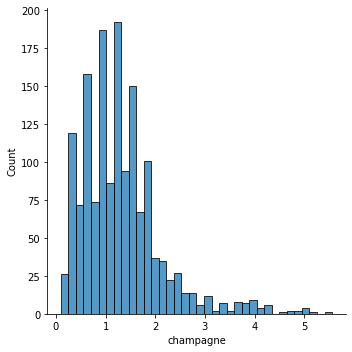

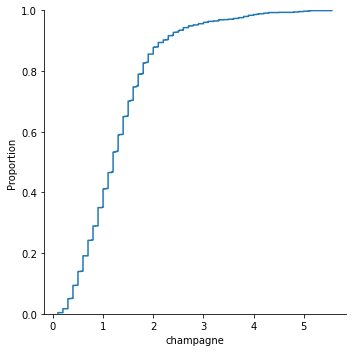

In [27]:
sns.displot(data_full["champagne"])
sns.displot(data_full["champagne"],kind="ecdf")
plt.show()

In [28]:
data_champagne = data_full.groupby(["region"])["champagne"].sum().sort_values(ascending=False).reset_index()
data_champagne

,region,champagne
0,Moscow,83.34
1,Magadan Oblast,55.76
2,Kamchatka Krai,52.00
3,Saint Petersburg,46.91
4,Sakhalin Oblast,45.99
...,...,...
79,Tuva Republic,8.47
80,Karachay-Cherkess Republic,6.07
81,Sevastopol,5.90
82,Republic of Crimea,4.10


#### The top 20 for champagne region

In [30]:
data_champagne_region = data_champagne["region"].head(20)
data_champagne_region

0                        Moscow
1                Magadan Oblast
2                Kamchatka Krai
3              Saint Petersburg
4               Sakhalin Oblast
5               Murmansk Oblast
6              Leningrad Oblast
7     Chukotka Autonomous Okrug
8               Khabarovsk Krai
9       Nenets Autonomous Okrug
10             Volgograd Oblast
11                Moscow Oblast
12                Komi Republic
13                  Tver Oblast
14               Primorsky Krai
15           Arkhangelsk Oblast
16              Smolensk Oblast
17           Kaliningrad Oblast
18     Sakha (Yakutia) Republic
19              Voronezh Oblast
Name: region, dtype: object

#### Fifth product: brandy

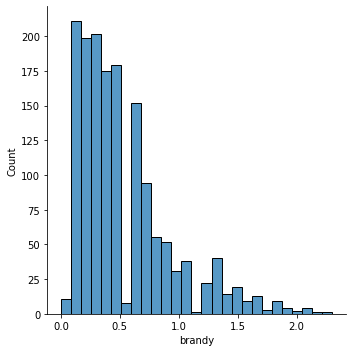

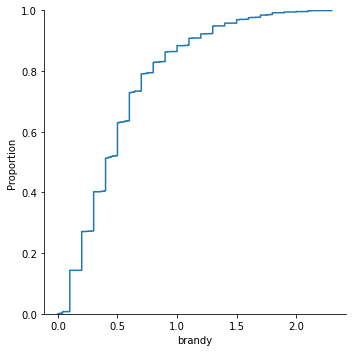

In [32]:
sns.displot(data_full["brandy"])
sns.displot(data_full["brandy"],kind="ecdf")
plt.show()

In [33]:
data_brandy = data_full.groupby(["region"])["brandy"].sum().sort_values(ascending=False).reset_index()
data_brandy

,region,brandy
0,Moscow,23.90
1,Kamchatka Krai,23.66
2,Kaliningrad Oblast,23.53
3,Murmansk Oblast,21.42
4,Saint Petersburg,21.23
...,...,...
79,Republic of Ingushetia,3.60
80,Sevastopol,3.30
81,Republic of Buryatia,3.27
82,Republic of Crimea,2.70


#### The top 20 for brandy region

In [35]:
data_brandy_region = data_brandy["region"].head(20)
data_brandy_region

0                                    Moscow
1                            Kamchatka Krai
2                        Kaliningrad Oblast
3                           Murmansk Oblast
4                          Saint Petersburg
5                          Leningrad Oblast
6                             Moscow Oblast
7                            Magadan Oblast
8            Yamalo-Nenets Autonomous Okrug
9                           Sakhalin Oblast
10                  Nenets Autonomous Okrug
11                Chukotka Autonomous Okrug
12    Khanty–Mansi Autonomous Okrug – Yugra
13                       Arkhangelsk Oblast
14                            Tyumen Oblast
15                            Komi Republic
16                      Republic of Karelia
17                          Khabarovsk Krai
18                        Sverdlovsk Oblast
19                    Republic of Khakassia
Name: region, dtype: object

#### Putting all regions in one table

In [37]:
data_all = {"brandy": data_brandy_region, "champagne": data_champagne_region, "vodka": data_vodka_region, "beer": data_beer_region, "wine": data_wine_region}
data_call = pd.DataFrame(data_all)
data_call

,brandy,champagne,vodka,beer,wine
0,Moscow,Moscow,Komi Republic,Saint Petersburg,Republic of Karelia
1,Kamchatka Krai,Magadan Oblast,Kamchatka Krai,Moscow,Pskov Oblast
2,Kaliningrad Oblast,Kamchatka Krai,Moscow,Yamalo-Nenets Autonomous Okrug,Vologda Oblast
3,Murmansk Oblast,Saint Petersburg,Magadan Oblast,Tyumen Oblast,Komi Republic
4,Saint Petersburg,Sakhalin Oblast,Sakhalin Oblast,Omsk Oblast,Novgorod Oblast
5,Leningrad Oblast,Murmansk Oblast,Nenets Autonomous Okrug,Chelyabinsk Oblast,Nenets Autonomous Okrug
6,Moscow Oblast,Leningrad Oblast,Arkhangelsk Oblast,Khanty–Mansi Autonomous Okrug – Yugra,Arkhangelsk Oblast
7,Magadan Oblast,Chukotka Autonomous Okrug,Vologda Oblast,Ivanovo Oblast,Murmansk Oblast
8,Yamalo-Nenets Autonomous Okrug,Khabarovsk Krai,Murmansk Oblast,Sverdlovsk Oblast,Leningrad Oblast
9,Sakhalin Oblast,Nenets Autonomous Okrug,Leningrad Oblast,Khabarovsk Krai,Kirov Oblast


#### Finding the comme regions

In [41]:
data_top_region = data_call.stack().value_counts()
data_top_region

Moscow                                   5
Komi Republic                            5
Leningrad Oblast                         4
Saint Petersburg                         4
Kamchatka Krai                           4
Smolensk Oblast                          4
Khabarovsk Krai                          4
Murmansk Oblast                          4
Arkhangelsk Oblast                       4
Moscow Oblast                            4
Nenets Autonomous Okrug                  4
Yaroslavl Oblast                         3
Tver Oblast                              3
Sverdlovsk Oblast                        3
Khanty–Mansi Autonomous Okrug – Yugra    3
Yamalo-Nenets Autonomous Okrug           3
Kaliningrad Oblast                       3
Magadan Oblast                           3
Sakhalin Oblast                          3
Tyumen Oblast                            3
Vologda Oblast                           3
Republic of Karelia                      3
Republic of Khakassia                    2
Ivanovo Obl

### Chart region

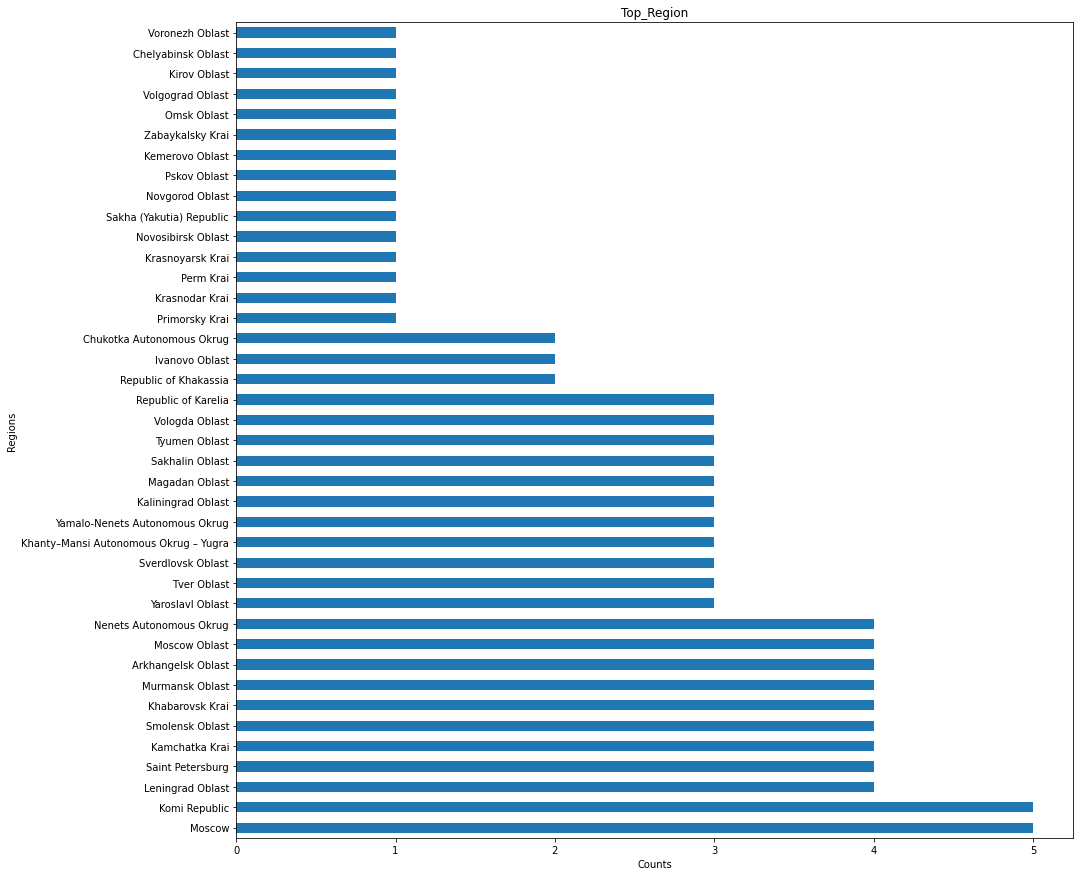

In [43]:
data_top_region.plot(kind="barh", figsize=(15, 15))
plt.ylabel("Regions")
plt.xlabel("Counts")
plt.title("Top_Region")
plt.show()

#### Top 10 region

In [45]:
print(data_top_region.head(11),"\n","I choose 11 not 10 because the regin(Saint Petersburg) is already used before")

Moscow                     5
Komi Republic              5
Leningrad Oblast           4
Saint Petersburg           4
Kamchatka Krai             4
Smolensk Oblast            4
Khabarovsk Krai            4
Murmansk Oblast            4
Arkhangelsk Oblast         4
Moscow Oblast              4
Nenets Autonomous Okrug    4
dtype: int64 
 I choose 11 not 10 because the regin(Saint Petersburg) is already used before


# Conclusion:

#### The Best regions we can promotion our products and it approximately will get the same result of Saint Petersburg promotion are:
Moscow
Komi Republic
Nenets Autonomous Okrug
Leningrad Oblast
Smolensk Oblast
Kamchatka Krai
Khabarovsk Krai
Arkhangelsk Oblast
Moscow Oblast
Murmansk Oblast